In [1]:
from keras.datasets import mnist
from direpack import dicomo, ppdire
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x1_train = x_train.reshape(60000, 784)
x1_test = x_test.reshape(10000, 784)

In [3]:
# test PCA efficiency of different data dimensions
x = x1_train[:, :]

## Dimension reduction: 1D

In [4]:
pppca_1d = ppdire(projection_index = dicomo, pi_arguments = {'mode' : 'var'}, n_components=1, optimizer='SLSQP')
pppca_1d.fit(x)

ppdire(pi_arguments={'mode': 'var'},
       projection_index=<class 'direpack.dicomo.dicomo.dicomo'>)

In [5]:
res_1d = np.dot(x, pppca_1d.x_loadings_)
res_1d

array([[ -861.82003862],
       [-1923.99795762],
       [ -802.53142113],
       ...,
       [ -623.39681769],
       [ -800.10330793],
       [ -685.89840822]])

In [6]:
# 使用网格搜索交叉验证来优化带宽
params_1d = {'bandwidth': np.logspace(1, 3, 20)}
grid_1d = GridSearchCV(KernelDensity(), params_1d)
grid_1d.fit(res_1d)
print("best bandwidth 1d: {0}".format(grid_1d.best_estimator_.bandwidth))

# 使用最佳估计器来计算核密度估计
kde_1d = grid_1d.best_estimator_

best bandwidth 1d: 16.237767391887218


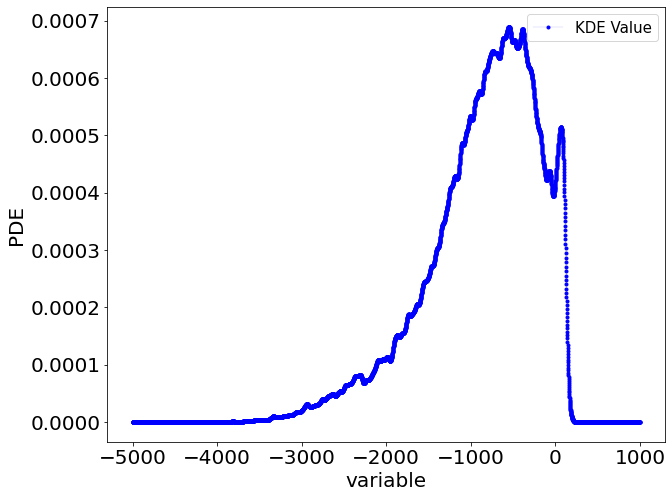

In [7]:
xplot_1d = np.linspace(-5000, 1000, 6000).reshape(-1,1)
dens_1d = kde_1d.score_samples(xplot_1d)  # 返回的是点对应概率密度的log值，需要使用exp求指数还原
plt.figure(figsize = (10, 8))  # 设置画布大小
plt.plot(xplot_1d, np.exp(dens_1d), marker='.', linewidth=0.1, c="b", label='KDE Value')
plt.tick_params(labelsize = 20)  # 设置坐标刻度值的大小
font = {'size': 20}  # 设置横纵坐标的名称以及对应字体格式、大小
plt.xlabel('variable', font)
plt.ylabel('PDE', font)
plt.legend(fontsize = 15)  # 显示图例,设置图例字体大小
plt.show()